# PA 3-2: Association Analysis - Apriori/FP Growth

## Student Details 

Student Name and ID: Group members name and ID :-

Krishna Kumar Balasubramanian 1001949939
Pooja Srinivasan 1001952061
Mohanraj Senabady 1001964323 


## Submission Instructions

Rename this submission file as specified in the instructions document

## Tasks

1.    Load the dataset (from the csv file)

In [1]:
import pandas as pd #pandas is a Python library used for working with data sets
import numpy as np #perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt #used for visualizations in Python
import seaborn as sns #seaborn is built on matplotlib
import ast #helps Python applications to process trees of the Python abstract syntax grammar
import time #returns the number of seconds passed since epoch

In [2]:
from matplotlib.pyplot import scatter #visual representation of how two variables relate to each other
from tqdm import tqdm #used to create a smart progress bar for the loops.
from mlxtend.preprocessing import TransactionEncoder #encodes database transaction data in form of a Python list of lists into a NumPy array.
from mlxtend.frequent_patterns import apriori #extracting frequent itemsets with applications in association rule learning.
from mlxtend.frequent_patterns import fpgrowth #the mining of pattern itemsets, subsequences, and substructures that appear frequently in a dataset
from mlxtend.frequent_patterns import association_rules #"if-then" statements, that help to show the probability of relationships between data items, within large data sets in various types of databases

In [3]:
data = pd.read_csv("dataset2.csv")
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [4]:
data.replace('', 'NaN', inplace=True)
data.dropna()
print("Null values:", data.isnull().sum())


Null values: 0         0
1         0
2     10080
3     12778
4     14168
5     14512
6     14687
7     14767
8     14912
9     14962
10    14962
dtype: int64


#### Converting items in the column as strings

In [5]:
data = data.astype(str)

#### Removing unnecessary commas and whitespace from the items column

#### Spliting the items column into a items list

#### Converting items column to a list of lists

In [6]:
trans = data.values.tolist()
print(trans)

[['whole milk', 'pastry', 'salty snack', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soda', 'pickled vegetables', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['canned beer', 'misc. beverages', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['sausage', 'hygiene articles', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['sausage', 'whole milk', 'rolls/buns', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole milk', 'soda', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['frankfurter', 'soda', 'whipped/sour cream', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['frankfurter', 'curd', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['beef', 'white bread', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['butter', 'whole milk', 'nan', 'nan', '

#### Convert each item string in the items column to a list of items

In [7]:
# data = data.apply(lambda x: eval(x) if isinstance(x, str) else x)
# data.head(5)

3.    Encode the dataset

#### Using transaction encoder fitting and transforming the data

In [8]:
# traen = TransactionEncoder()
# traen_array = traen.fit(data).transform(data)

In [9]:
data_en = pd.DataFrame(data) #fitting traen to the transactions data using the fit_transform method, which returns a NumPy array

In [10]:
# print(data_en.dtypes ,data_en.shape)

For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [19]:
#3 different combinations of support and confidence
sl = [0.01, 0.02, 0.03]
cl = [0.1, 0.2, 0.3]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        traen = TransactionEncoder() #the transactionEncoder class is used to convert a list of transactions into a one-hot encoded NumPy array or pandas DataFrame
        traen_array = traen.fit(trans).transform(trans)
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        print('freq_item',freq_item)
        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules

        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")  #checking whether the transctions are not empty
            continue
        
        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)

        #maximal and closed sets
        maxed_set = freq_item[~freq_item['itemsets'].apply(lambda x: any(frozenset(x).issubset(s) and frozenset(x) != s for s in freq_item['itemsets']))]['itemsets'].apply(frozenset).tolist()
        closed_set = freq_item[~freq_item['support'].duplicated(keep='last')]['itemsets'].apply(frozenset).tolist()
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        print("Top 10 rules ordered by confidence descending:")
        asso_rule.dropna()
        print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

freq_item       support                             itemsets
0    0.021386                           (UHT-milk)
1    0.033950                               (beef)
2    0.021787                            (berries)
3    0.016574                          (beverages)
4    0.045312                       (bottled beer)
..        ...                                  ...
133  0.010493  (rolls/buns, other vegetables, nan)
134  0.014837  (other vegetables, whole milk, nan)
135  0.013968        (rolls/buns, whole milk, nan)
136  0.011629              (soda, whole milk, nan)
137  0.011161            (yogurt, whole milk, nan)

[138 rows x 2 columns]
Support = 0.01 / Confidence = 0.10 / Total No.association rules: 83 / No. of Maximal Sets: 64 / No. of Closed Sets: 75

Top 10 rules ordered by confidence descending:
    antecedents consequents  antecedent support  consequent support  support  confidence     lift     leverage  conviction  zhangs_metric
     (UHT-milk)       (nan)            0.021386  

freq_item      support                   itemsets
0   0.021386                 (UHT-milk)
1   0.033950                     (beef)
2   0.021787                  (berries)
3   0.045312             (bottled beer)
4   0.060683            (bottled water)
..       ...                        ...
72  0.067767      (tropical fruit, nan)
73  0.043708  (whipped/sour cream, nan)
74  0.023993         (white bread, nan)
75  0.157923          (whole milk, nan)
76  0.085812              (yogurt, nan)

[77 rows x 2 columns]
Support = 0.02 / Confidence = 0.20 / Total No.association rules: 38 / No. of Maximal Sets: 38 / No. of Closed Sets: 44

Top 10 rules ordered by confidence descending:
    antecedents consequents  antecedent support  consequent support  support  confidence     lift  leverage  conviction  zhangs_metric
     (UHT-milk)       (nan)            0.021386            0.999933 0.021386         1.0 1.000067  0.000001         inf       0.000068
         (beef)       (nan)            0.033950   

freq_item      support                      itemsets
0   0.033950                        (beef)
1   0.045312                (bottled beer)
2   0.060683               (bottled water)
3   0.037626                 (brown bread)
4   0.035220                      (butter)
5   0.046916                 (canned beer)
6   0.053131                (citrus fruit)
7   0.031611                      (coffee)
8   0.033683                        (curd)
9   0.037091               (domestic eggs)
10  0.037760                 (frankfurter)
11  0.034017       (fruit/vegetable juice)
12  0.032213                   (margarine)
13  0.999933                         (nan)
14  0.038896                  (newspapers)
15  0.122101            (other vegetables)
16  0.051728                      (pastry)
17  0.049054                   (pip fruit)
18  0.037091                        (pork)
19  0.110005                  (rolls/buns)
20  0.069572             (root vegetables)
21  0.060349                     (sausage)
2

5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [12]:
#3 different combinations of support and confidence
sl = [0.01, 0.02, 0.03]
cl = [0.1, 0.2, 0.3]

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        freq_item = fpgrowth(data1, min_support=support, use_colnames=True) #fp Growth algorithm
        print(freq_item)
        asso_rule = association_rules(freq_item, metric="confidence", min_threshold=confidence) #generating association rules using the frequent itemsets

        #checking whether association rules are not empty
        if asso_rule.empty:
            print(f"No association rules found for Support={support} and Confidence={confidence}")
            continue

        #by applying frozenset to each item in the 'antecedents' column, we are essentially converting each set of antecedents into an immutable frozenset.s
        asso_rule['antecedents'] = asso_rule['antecedents'].apply(frozenset)
        asso_rule['consequents'] = asso_rule['consequents'].apply(frozenset)
                
        print(f"Support = {support:.2f}","/", f"Confidence = {confidence:.2f}","/", f"Total No.association rules: {len(asso_rule)}","/", f"No. of Maximal Sets: {len(maxed_set)}","/", f"No. of Closed Sets: {len(closed_set)}\n")
        # print("Top 10 rules ordered by confidence descending:")
        # print(asso_rule.nlargest(10, 'confidence').to_string(index=False))
        print("\n")

      support            itemsets
0    0.999933               (nan)
1    0.157923        (whole milk)
2    0.051728            (pastry)
3    0.018780       (salty snack)
4    0.085879            (yogurt)
..        ...                 ...
133  0.037091         (pork, nan)
134  0.015171    (ice cream, nan)
135  0.018512      (waffles, nan)
136  0.011829     (cat food, nan)
137  0.012030  (nan, chewing gum)

[138 rows x 2 columns]
Support = 0.01 / Confidence = 0.10 / Total No.association rules: 83 / No. of Maximal Sets: 27 / No. of Closed Sets: 34



      support            itemsets
0    0.999933               (nan)
1    0.157923        (whole milk)
2    0.051728            (pastry)
3    0.018780       (salty snack)
4    0.085879            (yogurt)
..        ...                 ...
133  0.037091         (pork, nan)
134  0.015171    (ice cream, nan)
135  0.018512      (waffles, nan)
136  0.011829     (cat food, nan)
137  0.012030  (nan, chewing gum)

[138 rows x 2 columns]
Support = 0.01

     support                      itemsets
0   0.999933                         (nan)
1   0.157923                  (whole milk)
2   0.051728                      (pastry)
3   0.085879                      (yogurt)
4   0.060349                     (sausage)
5   0.097106                        (soda)
6   0.046916                 (canned beer)
7   0.110005                  (rolls/buns)
8   0.043708          (whipped/sour cream)
9   0.037760                 (frankfurter)
10  0.033683                        (curd)
11  0.033950                        (beef)
12  0.035220                      (butter)
13  0.122101            (other vegetables)
14  0.067767              (tropical fruit)
15  0.069572             (root vegetables)
16  0.049054                   (pip fruit)
17  0.047584               (shopping bags)
18  0.032213                   (margarine)
19  0.060683               (bottled water)
20  0.045312                (bottled beer)
21  0.037091               (domestic eggs)
22  0.03889

6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

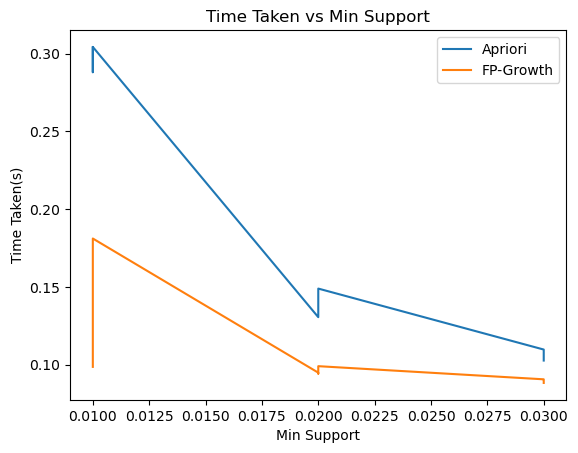

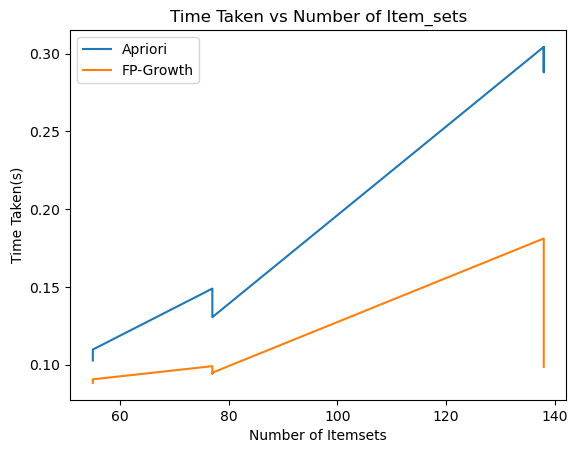

In [13]:
#3 different combinations of support and confidence
sl = [0.01, 0.02, 0.03]
cl = [0.1, 0.2, 0.3]

#checking whether the transctions are not empty
if not trans:
    raise ValueError("Input transactions are empty.")

#the lists below are is initialized as empty
ap_time = []
fp_time = []
min_support = []
itemsets_ap = []
itemsets_fp = []

#for loop used to traverse between support and confidence
for support in sl:
    for confidence in cl:

        #apriori algorithm
        start_time = time.time()
        traen = TransactionEncoder()
        traen_array = traen.fit(trans).transform(trans)
        data1 = pd.DataFrame(traen_array, columns=traen.columns_)
        freq_item = apriori(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        ap_time.append(end_time - start_time) #timedelta object representing the time difference between the two timestamps
        itemsets_ap.append(len(freq_item))
        min_support.append(support)

        #fp Growth algorithm
        start_time = time.time()
        freq_item = fpgrowth(data1, min_support=support, use_colnames=True)
        end_time = time.time()

        #time taken and number of itemsets generated
        fp_time.append(end_time - start_time)
        itemsets_fp.append(len(freq_item))


#graph 1: time vs min support
fig, ax = plt.subplots()
ax.plot(min_support, ap_time, label='Apriori')
ax.plot(min_support, fp_time, label='FP-Growth')
ax.set_xlabel('Min Support')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Min Support')
ax.legend()
plt.show()

#graph 2: time vs number of itemsets
fig, ax = plt.subplots()
ax.plot(itemsets_ap, ap_time, label='Apriori')
ax.plot(itemsets_fp, fp_time, label='FP-Growth')
ax.set_xlabel('Number of Itemsets')
ax.set_ylabel('Time Taken(s)')
ax.set_title('Time Taken vs Number of Item_sets')
ax.legend()
plt.show()

7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

Efficiency in terms of time and memory usage is a crucial feature for frequent itemset mining (FIM) algorithms due to the typical use of FIM in analyzing large datasets. Apriori and FP-growth are two of the most fundamental FIM algorithms, and they each have unique advantages and limitations in terms of their efficiency and performance.

Based on the first graph, we can observe that the execution time for both Apriori and FP-growth algorithms decreases as the minimum support value increases. However, the execution time for FP-growth is consistently lower than Apriori for most of the minimum support values tested. On the other hand, Apriori shows higher execution times for most of its tested values. This indicates that FP-growth is a more efficient algorithm compared to Apriori in terms of execution time.

The second graphs illustrate that the FP-growth algorithm outperforms Apriori in terms of both execution time and number of itemsets generated for the same maximum itemset size value. Specifically, the execution time of FP-growth is generally lower than Apriori, while the number of itemsets generated by FP-growth is generally smaller than Apriori. Based on these findings, we can conclude that FP-growth is a more efficient algorithm than Apriori.

# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7

In [14]:
#Reference
#https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis
#https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342